# Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?”

1. The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc).
2. The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real.
3. Then compute the p-value, which is the probability of the null hypothesis being true.
4. Finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

In [ ]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

# Download Teaching Rating Dataset

Please download the teaching rating dataset from [here](https://drive.google.com/drive/folders/1OA2MZaoX-Sx_h7ssDE4QPixddmsP86Y1?usp=sharing).

In [36]:
# Downoad from google drive
od.download("https://drive.google.com/file/d/1O8OCiSIWtVqqAgjUFjbvQagz86kuQHNx/view?usp=sharing")

# Load the dataset into a pandas DataFrame.
df = pd.read_csv("teachingratings.csv")

# show the DataFrame.
display(df)

39650it [00:00, 116868695.43it/s]

Downloaded to  ./teachingratings.csv


,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,no,37,male,more,0.933396,3.5,upper,yes,yes,15,17,40,1,0,0,0,1,1,1
459,no,58,female,more,0.111563,3.5,upper,yes,yes,26,34,47,1,0,1,0,1,1,1
460,no,42,male,more,-0.900580,4.0,upper,yes,yes,45,86,61,1,0,0,0,1,1,1
461,no,39,male,more,0.643014,4.3,upper,yes,yes,22,29,62,1,0,0,0,1,1,1


# Task 1: Using the independent samples t-Test, does gender (i.e., 'gender') affect teaching evaluation rates (i.e., 'eval')?

In Task 1, we will be using the t-test for independent samples.

For the independent t-test, the following assumptions must be met.

- Observations in each sample are independent and identically distributed (iid).
    - Each subject should belong to only one group. There is no relationship between the observations in each group.
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

## **Task 1.1: Please state the hypothesis when we are using the independent samples t-Test**

Please provide your answer in the text cell below what are the Null Hypothesis (H0) and the Alternative Hypothesis (H1)

- Null Hypothesis (**H0**): The rating is not different in between Male vs Female Teachers
- Alternative Hypothesis (**H1**): The rating is different in between Male vs Female Teachers

In [37]:
# Null Hypothesis (H0): The rating is not different in between Male vs Female Teachers
# Alternative Hypothesis (H1): The rating is different in between Male vs Female Teachers

## Task 1.2: Split the dataset into the teachers' rating from males and females

In [38]:
male_rating_df = df[df['gender'] == 'male']['eval']
female_rating_df = df[df['gender'] == 'female']['eval']
display(male_rating_df)
display(female_rating_df)

4      4.5
5      4.0
6      2.1
7      3.7
8      3.2
      ... 
450    3.2
451    4.3
458    3.5
460    4.0
461    4.3
Name: eval, Length: 268, dtype: float64

0      4.3
1      3.7
2      3.6
3      4.4
9      4.3
      ... 
455    4.1
456    3.3
457    2.3
459    3.5
462    3.0
Name: eval, Length: 195, dtype: float64

## Task 1.3: Test whether the teaching evaluation ratings 'eval' are normally distributed

### Task 1.3.1: Visual Inspection

Please use `sns.histplot` to visually inspect whether the `'eval'` column is normally distributed.

Please provide your answer in the text cell below whether the data are normally distributed.

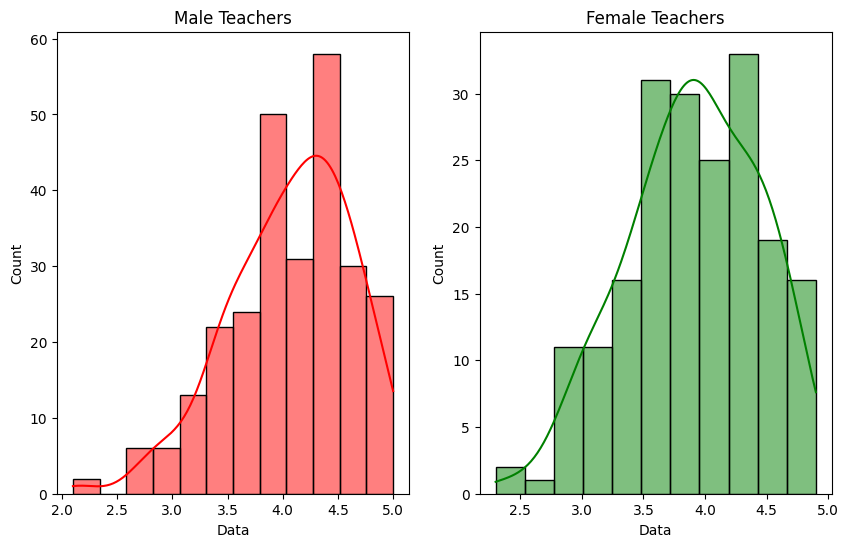

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))
# male
sns.histplot(male_rating_df, kde=True, ax=axes[0], color="red")
axes[0].set_title('Male Teachers')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Count')

# female
sns.histplot(female_rating_df, kde=True, ax=axes[1], color="green")
axes[1].set_title('Female Teachers')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Count')
plt.show()

### Task 1.3.2: Normality Test via Shapiro-Wilk test

Please use `scipy.stats.shapiro` to test for normality.

Please provide your answer in the text cell below whether the data are normally distributed.

In [40]:
from scipy.stats import shapiro
male_test = shapiro(male_rating_df)
female_test = shapiro(female_rating_df)
display("Male:", male_test)
display("Female", female_test)


stat, p = shapiro(male_rating_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian' )
else:
 print('Probably not Gaussian' )


 stat, p = shapiro(female_rating_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian' )
else:
 print('Probably not Gaussian' )

'Male:'

ShapiroResult(statistic=np.float64(0.9687742582799467), pvalue=np.float64(1.3880709041665185e-05))

'Female'

ShapiroResult(statistic=np.float64(0.98163174037128), pvalue=np.float64(0.011731484258520962))

stat=0.969, p=0.000
Probably not Gaussian
stat=0.982, p=0.012
Probably not Gaussian


*<span style="color:yellow">
From Shapiro Test for Normality, we found Male Test Score is 0.968 and Female Test Score is 0.981
P value for male is 1.388
P Value for Female is 0.011
So it means both male and female data is not normal distribution because P value is lower < alpha 0.05
</span>*

## Task 1.4: Verify that the variances of teaching evaluation rates are equal

Please specify `center` when using `scipy.stats.levene` based on your conclusion in Task 1.3.1.

**Hint**:

- `center='mean'` is used when the data are normally distributed.
- `center='median'` is used when the data are not normally distributed.

Please provide your answer below whether two samples have the same variances.

In [41]:
from scipy.stats import levene
test = levene(male_rating_df, female_rating_df, center='median')
display(test)

# Data is normally distributed
stat, p = levene(male_rating_df, female_rating_df, center='mean')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: print('Probably the same variances' )
else: print('Probably different variances' )


# Data is NOT normally distributed
stat, p = levene(male_rating_df, female_rating_df, center='median')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: print('Probably the same variances' )
else: print('Probably different variances' )

LeveneResult(statistic=np.float64(0.1194317835514822), pvalue=np.float64(0.7298092272287092))

stat=0.190, p=0.663
Probably the same variances
stat=0.119, p=0.730
Probably the same variances


*<span style="color:yellow">
The Levene Test shows that Statistics is 0.119 and P values is 0.729
so here as well alpha 0.05 < P value so it is not normal distribution
</span>*



## Task 1.5: Perform the independent samples t-Test

Please specify `equal_var` when using `scipy.stats.ttest_ind` based on the Levene's test results in Task 1.4.

Please provide your answer in the text cell below whether the gender affects teaching evaluation rating based on the t-test result.

In [42]:
from scipy.stats import ttest_ind
t_test = ttest_ind(male_rating_df, female_rating_df, equal_var=True)
display(t_test)

stat, p = ttest_ind(male_rating_df, female_rating_df, equal_var=True)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution' )
else:
 print('Probably different distributions' )

TtestResult(statistic=np.float64(3.249937943510772), pvalue=np.float64(0.0012387609449522217), df=np.float64(461.0))

stat=3.250, p=0.001
Probably different distributions


*<span style="color:yellow">The statistics is 3.2499 and P value is 0.0012 which is lower that alpha 0.05</span>*


## Task 1.6: Perform the Mann-Whitney U-Test to see whether the gender (i.e., `'gender'`) affects teaching evaluation rates (i.e., `'eval'`)?

Please provide your answer in the text cell below whether the gender affects teaching evaluation rating based on the Mann-Whitney U-Test result.

In [43]:
from scipy.stats import mannwhitneyu
u_test = mannwhitneyu(male_rating_df, female_rating_df)
display(u_test)

u_test = mannwhitneyu(male_rating_df, female_rating_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution' )
else:
 print('Probably different distributions' )

MannwhitneyuResult(statistic=np.float64(30911.0), pvalue=np.float64(0.0007567781189068588))

stat=3.250, p=0.001
Probably different distributions


*<span style="color:yellow">Here also statistics is 30911.0 and P value is 0.00075 which is lover that alpha 0.05</span>*


# Task 2: Using the one-way ANOVA, does teaching evaluation score for instructors differ by age?

For the one-way ANOVA, the following assumptions must be met.

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

The following code can be used to split the dataset into three age groups: young, mid and old.

```python
young_rating_df = df.loc[(df['age'] <= 40), 'eval']
mid_rating_df = df.loc[(df['age'] > 40) & (df['age'] < 57), 'eval']
old_rating_df = df.loc[(df['age'] >= 57), 'eval']
```

In this task, we will assume that the data in each age group are normally distributed. Thus the only test left before we can run the one-way ANOVA is the test for the equality of variances.

## Task 2.1: Compute the mean and the std of each group

In [44]:
young_rating_df = df.loc[(df['age'] <= 40), 'eval']
mid_rating_df = df.loc[(df['age'] > 40) & (df['age'] < 57), 'eval']
old_rating_df = df.loc[(df['age'] >= 57), 'eval']

dictgroup = {
    'young': {'Mean': young_rating_df.mean(), 'Standard Deviation': young_rating_df.std()},
    'mid': {'Mean': mid_rating_df.mean(), 'Standard Deviation': mid_rating_df.std()},
    'old': {'Mean': old_rating_df.mean(), 'Standard Deviation': old_rating_df.std()}
}

display(dictgroup)

{'young': {'Mean': np.float64(4.002654871054455),
  'Standard Deviation': np.float64(0.5057632493708224)},
 'mid': {'Mean': np.float64(4.030701748111792),
  'Standard Deviation': np.float64(0.5379234358312474)},
 'old': {'Mean': np.float64(3.9336065581587496),
  'Standard Deviation': np.float64(0.6242497286958886)}}

## Task 2.2: Perform Levene's test

Please specify `center` when using `scipy.stats.levene` to follow the normal distribution assumption.

**Hint**: As `scipy.stats.levene` support more than two sets of samples, so you can run the test on three groups in one go.

Please provide your answer in the text cell below whether the variance are the same or different.

In [45]:
from scipy.stats import levene

# Data is normally distributed
stat, p  = levene(young_rating_df, mid_rating_df, old_rating_df, center="mean")
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: print('Probably the same variances' )
else: print('Probably different variances' )

# Data is NOT normally distributed
stat, p  = levene(young_rating_df, mid_rating_df, old_rating_df, center="mean")
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: print('Probably the same variances' )
else: print('Probably different variances' )

stat=3.820, p=0.023
Probably different variances
stat=3.820, p=0.023
Probably different variances


*<span style="color:yellow">the statistics is 3.820 and P value 0.0226 which is also lower than alpha 0.05</span>*

## Task 2.3: Perform one-way ANOVA

Regardless of whether the assumption on the same variances hold, please write your code perform the one-way ANOVA.

Please provide your answer in the text cell below whether the teaching evaluation rating differ by age groups?

*<span style="color:yellow">The statistics is 1.233 and P values is 0.295 which is higher than alpha 0.05</span>*

In [46]:
#  %%shell
#  jupyter nbconvert /content/LAB_7_6638009.ipynb --to html